<a href="https://colab.research.google.com/github/j-min/VL-T5/blob/main/inference_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VL-T5 inference on custom images

## Download code and install dependencies

In [1]:
!pip uninstall param -y # to resolve name conflict with src.param.py
!pip install -r requirements.txt
!python download_backbones.py

  Cloning git://github.com/j-min/language-evaluation (to revision master) to /srv/condor/execute/dir_1545/pip-req-build-z7e3m7op
  Running command git clone --filter=blob:none -q git://github.com/j-min/language-evaluation /srv/condor/execute/dir_1545/pip-req-build-z7e3m7op
  fatal: remote error:
    The unauthenticated git protocol on port 9418 is no longer supported.
  Please see https://github.blog/2021-09-01-improving-git-protocol-security-github/ for more information.
ERROR: Command errored out with exit status 128: git clone --filter=blob:none -q git://github.com/j-min/language-evaluation /srv/condor/execute/dir_1545/pip-req-build-z7e3m7op Check the logs for full command output.
You should consider upgrading via the '/home/heyitao2/anaconda3/bin/python -m pip install --upgrade pip' command.
T5-base
BART-base
Done!


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import sys

import cv2
import requests
from io import BytesIO
import PIL.Image
import numpy as np

In [3]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

## Download the pretrained checkpoint

In [4]:
# !pip install gdown
import gdown

In [5]:
!mkdir -p VL-T5/snap/pretrain/VLT5

In [6]:
# gdown.download('https://drive.google.com/uc?id=100qajGncE_vc4bfjVxxICwz3dwiAxbIZ', 'VL-T5/snap/pretrain/VLT5/Epoch30.pth', quiet=False)

## Add source code path

In [7]:
import sys

In [8]:
sys.path.append('/home/heyitao2/Experiments/prediction/VL-T5/VL-T5/src')
sys.path.append('/home/heyitao2/Experiments/prediction/VL-T5/VL-T5/inference')

In [9]:
cd VL-T5

/home/heyitao2/Experiments/prediction/VL-T5/VL-T5


In [10]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Build a model and load weights from the pretrained checkpoint

In [11]:
!pip uninstall param

In [12]:
from param import parse_args

In [13]:
args = parse_args(
    parse=False,
    backbone='t5-base',
    load='snap/pretrain/VLT5/Epoch30'
)
args.gpu = 0

In [14]:
# from vqa import Trainer
# trainer = Trainer(args,
#                   train=False
#                   )

In [15]:
from refcoco import Trainer as Trainer1
trainer1 = Trainer1(args,
                  train=False
                  )

Building Model at GPU 0


Some weights of VLT5RefCOCO were not initialized from the model checkpoint at t5-base and are newly initialized: ['encoder.visual_embedding.feat_embedding.0.weight', 'encoder.visual_embedding.feat_embedding.0.bias', 'encoder.visual_embedding.feat_embedding.1.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.bias', 'encoder.visual_embedding.absolute_vis_pos_embedding.1.weight', 'encoder.visual_embedding.obj_order_embedding.weight', 'encoder.visual_embedding.img_order_embedding.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded from  snap/pretrain/VLT5/Epoch30.pth
_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder.visual_embedding.layer_norm.weight'])
Model Launching at GPU 0
It took 5.1s


In [16]:
!ls
!

inference  input (1).jpg  input.jpg  scripts  snap  src


# Faster R-CNN inference script (from [Huggingface transformers LXMERT demo](https://github.com/huggingface/transformers/tree/master/examples/research_projects/lxmert))

In [17]:
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from inference.processing_image import Preprocess
from inference.visualizing_image import SingleImageViz
from inference.modeling_frcnn import GeneralizedRCNN
from inference.utils import Config, get_data

import wget
import pickle
import os


URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg"
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"

objids = get_data(OBJ_URL) 
attrids = get_data(ATTR_URL)
gqa_answers = get_data(GQA_URL) 
vqa_answers = get_data(VQA_URL) 
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg) 
image_preprocess = Preprocess(frcnn_cfg) 

# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/heyitao2/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [43]:
# image_filename = wget.download(URL)
# print(image_filename)
# print(objids[1442])

/home/heyitao2/anaconda3/envs/software/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


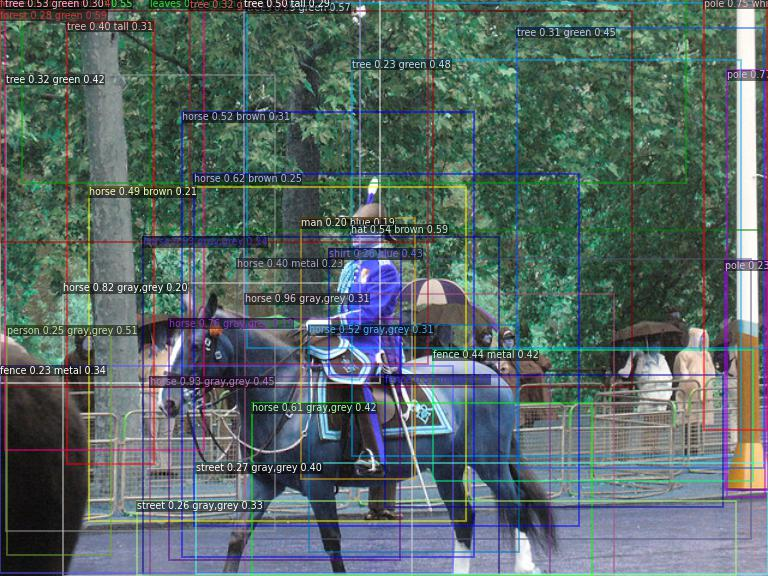

In [19]:
image_filename = 'input.jpg'
image_dirname = image_filename
frcnn_visualizer = SingleImageViz(image_filename, id2obj=objids, id2attr=attrids) 

images, sizes, scales_yx = image_preprocess(image_filename) 

output_dict = frcnn(
    images, 
    sizes, 
    scales_yx = scales_yx, 
    padding = 'max_detections', 
    max_detections = frcnn_cfg.max_detections, 
    return_tensors = 'pt' 
)

# add boxes and labels to the image 
frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"), 
    output_dict.get("obj_ids"),
    output_dict.get("obj_probs"),
    output_dict.get("attr_ids"), 
    output_dict.get("attr_probs"),
)

showarray(frcnn_visualizer._get_buffer())

normalized_boxes = output_dict.get("normalized_boxes") 
features = output_dict.get("roi_features") 


In [20]:
# print(output_dict.get("boxes"))
torch.set_printoptions(precision=4, sci_mode=False)
print(output_dict.get("boxes").shape)
print(features.shape)
# print(sizes)
# print(scales_yx)
raw_sizes = sizes * scales_yx
print(raw_sizes)

torch.Size([1, 36, 4])
torch.Size([1, 36, 2048])
tensor([[480.0000, 640.0000]])


In [21]:
output_dict

OrderedDict([('obj_ids',
              tensor([[  42,   42,   42,   42,  601,   42,  601,   42,   42,  236,  234,  291,
                         42,   42,  291,   42,  236,  291,   42,  291,  291,  291, 1180,  381,
                        533,  308,   51,  308,  533,  364, 1180,  236,  291,  601, 1180,   50]])),
             ('obj_probs',
              tensor([[0.9562, 0.9311, 0.9258, 0.8217, 0.7652, 0.7587, 0.7462, 0.6150, 0.6103,
                       0.5683, 0.5445, 0.5257, 0.5167, 0.5167, 0.5009, 0.4934, 0.4385, 0.3990,
                       0.3968, 0.3238, 0.3198, 0.3126, 0.2891, 0.2885, 0.2849, 0.2676, 0.2639,
                       0.2599, 0.2515, 0.2469, 0.2446, 0.2337, 0.2300, 0.2270, 0.2046, 0.2039]])),
             ('attr_ids',
              tensor([[ 0,  0,  0,  0,  7,  0,  7, 23,  0, 70, 23,  8,  0, 23, 59, 23, 70, 59,
                       70,  8,  8,  8,  8,  8,  8,  0,  6,  0,  8,  0,  8, 70,  8, 10,  8,  6]])),
             ('attr_probs',
              tensor([[0.31

In [22]:
# print(output_dict.get("boxes"))
# output_dict.get("boxes").get_device()
print(output_dict.get("obj_ids"))
print(output_dict.get("attr_ids"))

tensor([[  42,   42,   42,   42,  601,   42,  601,   42,   42,  236,  234,  291,
           42,   42,  291,   42,  236,  291,   42,  291,  291,  291, 1180,  381,
          533,  308,   51,  308,  533,  364, 1180,  236,  291,  601, 1180,   50]])
tensor([[ 0,  0,  0,  0,  7,  0,  7, 23,  0, 70, 23,  8,  0, 23, 59, 23, 70, 59,
         70,  8,  8,  8,  8,  8,  8,  0,  6,  0,  8,  0,  8, 70,  8, 10,  8,  6]])


In [23]:
print(normalized_boxes.shape)
vis_attention_mask = torch.ones(36).unsqueeze(0)
print(vis_attention_mask)

torch.Size([1, 36, 4])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [24]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.show()

## Load Tokenizer

In [25]:
from tokenization import VLT5TokenizerFast

In [26]:
tokenizer = VLT5TokenizerFast.from_pretrained('t5-base')

In [27]:
correct_indices = torch.arange(0,36)
print(correct_indices)
all_target_ids = torch.FloatTensor(tokenizer.convert_tokens_to_ids([f'<vis_extra_id_{idx}>' for idx in correct_indices]))
print(all_target_ids)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
tensor([32199., 32198., 32197., 32196., 32195., 32194., 32193., 32192., 32191.,
        32190., 32189., 32188., 32187., 32186., 32185., 32184., 32183., 32182.,
        32181., 32180., 32179., 32178., 32177., 32176., 32175., 32174., 32173.,
        32172., 32171., 32170., 32169., 32168., 32167., 32166., 32165., 32164.])


## Inference

In [28]:
# questions = ["vqa: What is the man doing?", 
#              "vqa: What color is the clothing the man wears?", 
#              "vqa: What color is the horse?",] 
questions = ["visual grounding: human", 
             "visual grounding: black horse",] 

In [29]:
for question in questions:
    input_ids = tokenizer(question, return_tensors='pt', padding=True).input_ids
    batch = {}
    batch['input_ids'] = input_ids
    batch['vis_feats'] = features
    batch['boxes'] = normalized_boxes
#     batch['vis_attention_mask'] = output_dict.get("obj_ids")
    batch['vis_attention_mask'] = vis_attention_mask
    batch['all_target_ids'] = torch.FloatTensor(tokenizer.convert_tokens_to_ids([f'<vis_extra_id_{idx}>' for idx in correct_indices]))

    result = trainer1.model.test_step(batch)
    print(f"Q: {question}")
    print(f"A: {result['correct']}")
    print(result)
    print(input_ids)
# for question in questions:
#     input_ids = tokenizer(question, return_tensors='pt', padding=True).input_ids
#     batch = {}
#     batch['input_ids'] = input_ids
#     batch['vis_feats'] = features
#     batch['boxes'] = normalized_boxes

#     result = trainer.model.test_step(batch)
#     print(f"Q: {question}")
#     print(f"A: {result['pred_ans'][0]}")

Q: visual grounding: human
A: [0.]
{'pred': array([32099]), 'correct': array([0.])}
tensor([[3176, 1591,   53,   10,  936,    1]])
Q: visual grounding: black horse
A: [0.]
{'pred': array([3214]), 'correct': array([0.])}
tensor([[3176, 1591,   53,   10, 1001, 4952,    1]])


In [30]:
print(tokenizer.convert_tokens_to_ids([f'<vis_extra_id_{idx}>' for idx in correct_indices]))

[32199, 32198, 32197, 32196, 32195, 32194, 32193, 32192, 32191, 32190, 32189, 32188, 32187, 32186, 32185, 32184, 32183, 32182, 32181, 32180, 32179, 32178, 32177, 32176, 32175, 32174, 32173, 32172, 32171, 32170, 32169, 32168, 32167, 32166, 32165, 32164]


## COCO Image Inference Using data loader at Refcoco_data.py

In [31]:
args.vis_pointer= False
args.use_vision = True
print(args)

Configurations
{'RefCOCO_BUTD': False,
 'RefCOCO_GT': False,
 'adam_beta1': 0.9,
 'adam_beta2': 0.999,
 'adam_eps': 1e-06,
 'answer_normalize': False,
 'backbone': 't5-base',
 'batch_size': 256,
 'caption_cocoonly': True,
 'caption_only': False,
 'classifier': False,
 'clip_grad_norm': -1.0,
 'coco_only': False,
 'comment': '',
 'distributed': False,
 'do_lower_case': False,
 'dropout': 0.1,
 'dry': False,
 'epochs': 12,
 'feat_dim': 2048,
 'fp16': False,
 'from_scratch': False,
 'gen_max_length': 20,
 'gpu': 0,
 'gradient_accumulation_steps': 1,
 'ground_upsample': 1,
 'ground_weight': 1,
 'individual_vis_layer_norm': True,
 'itm_cocoonly': True,
 'load': 'snap/pretrain/VLT5/Epoch30',
 'local_rank': -1,
 'log_train_accuracy': False,
 'losses': 'lm,obj,attr,feat',
 'lr': 0.0001,
 'max_n_boxes': 36,
 'max_text_length': 20,
 'multiGPU': False,
 'multitask_sampling': 'roundrobin',
 'n_boxes': 36,
 'n_ground': 1,
 'no_prefix': False,
 'num_beams': 1,
 'num_workers': 0,
 'obj_mask_rate': 0.

In [32]:
from src import refcoco_data

In [33]:
loader = refcoco_data.get_loader(args, split='val', mode='val', batch_size=256, gpu=0, topk=-1)
# %tb

Data sources:  ['val']
loading dataset refcocog into memory...
creating index...
index created.
DONE (t=11.35s)
# all sentences: 4896


In [34]:
# for i_batch, sample_batched in enumerate(loader):
#         print(i_batch, sample_batched.keys())
        
#         break


In [35]:
valid_score_dict = trainer1.evaluate(loader)

Prediction:   0%|                                                                                | 0/20 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Prediction: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  2.12it/s]

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Prediction: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


In [36]:
valid_acc = valid_score_dict['n_correct']/valid_score_dict['n_total'] * 100
print(valid_acc)

0.0


In [37]:
test_loader = refcoco_data.get_loader(args, split='test', mode='test', batch_size=256, gpu=0, topk=-1)

Data sources:  ['test']
loading dataset refcocog into memory...
creating index...
index created.
DONE (t=12.84s)
# all sentences: 9602


In [38]:
test_score_dict = trainer1.evaluate(test_loader)

Prediction:   0%|                                                                                | 0/38 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Prediction: 100%|███████████████████████████████████████████████████████████████████████| 38/38 [00:27<00:00,  1.85it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Prediction: 100%|███████████████████████████████████████████████████████████████████████| 38/38 [00:28<00:00,  1.35it/s]


In [39]:
test_acc = test_score_dict['n_correct']/test_score_dict['n_total'] * 100
print(test_acc)

0.0


In [40]:
train_loader = refcoco_data.get_loader(args, split='train', mode='train', batch_size=256, gpu=0, topk=-1)

Data sources:  ['train']
loading dataset refcocog into memory...
creating index...
index created.
DONE (t=15.07s)
# all sentences: 80512


In [41]:
train_score_dict = trainer1.evaluate(train_loader)

Prediction:   0%|                                                                               | 0/315 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Prediction: 100%|█████████████████████████████████████████████████████████████████████| 315/315 [05:00<00:00,  1.52it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Prediction: 100%|█████████████████████████████████████████████████████████████████████| 315/315 [05:00<00:00,  1.05it/s]


In [42]:
train_acc = train_score_dict['n_correct']/train_score_dict['n_total'] * 100
print(train_acc)

0.0


In [43]:
# print(sample_batched['targets'])
# # im = cv2.imread("../datasets/COCO/train2014/COCO_train2014_000000181828.jpg")
# # imshow(im)
# print(sample_batched['img_ids'])

In [44]:
# print(sample_batched['boxes'][0])
# print(sample_batched['input_ids'])
# print(sample_batched['all_target_ids'])
# print(sample_batched['vis_attention_mask'])

In [45]:
# questions = sample_batched['input_texts']
# for question in questions:
# #     input_ids = tokenizer(question, return_tensors='pt', padding=True).input_ids
#     batch = {}
#     batch['input_ids'] = sample_batched['input_ids']
#     batch['vis_feats'] = sample_batched['vis_feats']
#     batch['boxes'] = sample_batched['boxes']
# #     batch['vis_attention_mask'] = output_dict.get("obj_ids")
#     batch['vis_attention_mask'] = sample_batched['vis_attention_mask']
#     batch['all_target_ids'] = sample_batched['all_target_ids']

#     result = trainer1.model.test_step(batch)
#     print(f"Q: {question}")
#     print(f"A: {result['correct']}")
#     print(result['pred'])

In [46]:
    print(result['correct'])

[0.]


## RefCoco Inference (Not Using for now)

#### MaskRCNN

In [28]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You should consider upgrading via the '/home/heyitao2/anaconda3/bin/python -m pip install --upgrade pip' command.
torch:  1.10 ; cuda:  1.10.0


In [29]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [30]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.show()

In [31]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/heyitao2/Experiments/prediction/VL-T5/VL-T5


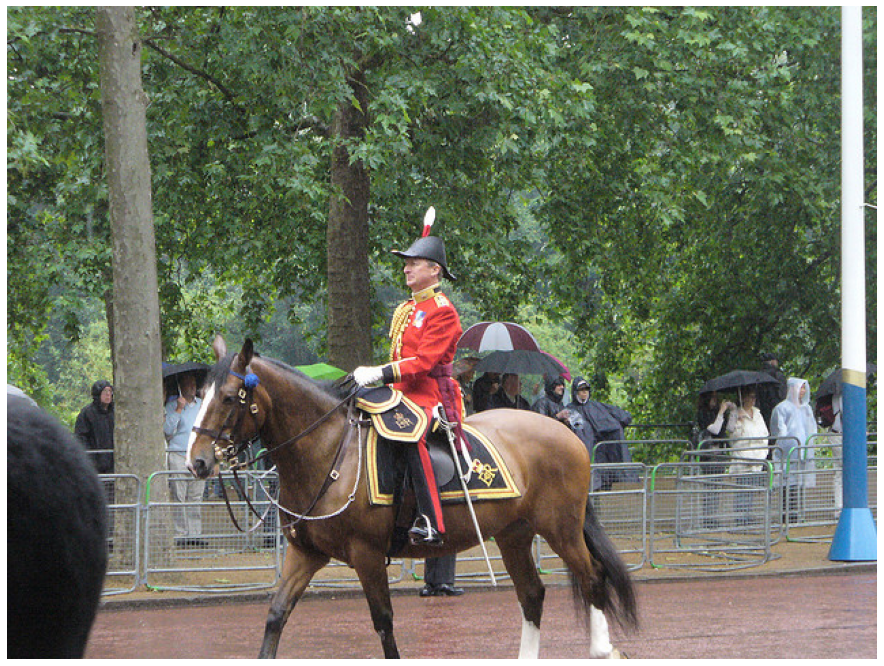

In [32]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
imshow(im)

In [33]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs,mask_features = predictor(im)

In [34]:
print(mask_features.shape)
feature_pooled = mask_features.mean(dim=[2, 3])
print(feature_pooled.shape)

torch.Size([21, 2048, 7, 7])
torch.Size([21, 2048])


In [69]:
# print(outputs["instances"].Boxes.shape)
# print(outputs["instances"].pred_boxes)
print(outputs["instances"].pred_boxes.tensor.shape)
print(outputs["instances"].pred_masks.shape)
print(outputs["instances"])

torch.Size([21, 4])
torch.Size([21, 480, 640])
Instances(num_instances=21, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[  129.6035,   240.4632,   464.5923,   480.0000],
        [  251.3552,   165.2443,   337.4068,   411.0380],
        [  114.4684,   266.6468,   146.9837,   396.6124],
        [   48.2378,   273.8803,    79.3482,   345.3513],
        [  514.9018,   279.7972,   560.6151,   349.6311],
        [    0.3940,   278.2786,    75.9379,   478.0816],
        [  406.1966,   272.7262,   460.9725,   345.0130],
        [  561.5128,   271.5168,   596.7823,   362.8117],
        [  385.9569,   270.5694,   411.3267,   304.6264],
        [  346.4974,   269.9961,   384.3965,   298.5361],
        [  509.9921,   266.2986,   572.1805,   285.5533],
        [  331.3488,   231.3925,   392.9297,   256.0069],
        [  335.7125,   251.4696,   410.6620,   274.8159],
        [  508.1289,   282.3361,   532.3632,   340.2488],
        [  551.7435,   255.9564,   571.0947,   306.5

In [36]:
def norm_box(boxes, raw_sizes):
    if not isinstance(boxes, torch.Tensor):
        normalized_boxes = boxes.copy()
    else:
        normalized_boxes = boxes.clone()
    normalized_boxes[:, :, (0, 2)] /= raw_sizes[:, 1].view(-1, 1, 1)
    normalized_boxes[:, :, (1, 3)] /= raw_sizes[:, 0].view(-1, 1, 1)
    return normalized_boxes

In [37]:
boxes = outputs["instances"].pred_boxes.tensor.unsqueeze(0).cpu()
# print(boxes)
normalized_boxes = norm_box(boxes, raw_sizes)
print(normalized_boxes.shape)
feature_pooled = feature_pooled.unsqueeze(0)
print(feature_pooled.shape)
# pred_masks = outputs["instances"].pred_masks.get_device()

torch.Size([1, 21, 4])
torch.Size([1, 21, 2048])


In [38]:
pred_masks = outputs["instances"].pred_masks
pred_masks = pred_masks.unsqueeze(0)

In [39]:
print(pred_masks.shape)

torch.Size([1, 21, 480, 640])


In [40]:
pred_masks = pred_masks.squeeze(0)

In [41]:
pred_masks_flatten = pred_masks.flatten(1)
print(pred_masks.shape)

torch.Size([21, 480, 640])


In [42]:
pred_classes = outputs["instances"].pred_classes.unsqueeze(0)
print(pred_classes.shape)

torch.Size([1, 21])


In [98]:
from refcoco import Trainer as Trainer1
trainer1 = Trainer1(args,
                  train=False
                  )

Building Model at GPU 0


Some weights of VLT5RefCOCO were not initialized from the model checkpoint at t5-base and are newly initialized: ['encoder.visual_embedding.feat_embedding.0.weight', 'encoder.visual_embedding.feat_embedding.0.bias', 'encoder.visual_embedding.feat_embedding.1.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.bias', 'encoder.visual_embedding.absolute_vis_pos_embedding.1.weight', 'encoder.visual_embedding.obj_order_embedding.weight', 'encoder.visual_embedding.img_order_embedding.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded from  snap/pretrain/VLT5/Epoch30.pth
_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder.visual_embedding.layer_norm.weight'])
Model Launching at GPU 0
It took 0.2s


In [55]:
questions = ["refcoco: horse", ] 
B, V_L = feature_pooled.size()[:2]
print(B, V_L)

1 21


In [66]:
target_id = torch.ones(21)
print(target_id)
target_id = target_id.unsqueeze(0)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.])


In [90]:
for question in questions:
    input_ids = tokenizer(question, return_tensors='pt', padding=True).input_ids
    batch = {}
    batch['input_ids'] = input_ids
    batch['vis_feats'] = feature_pooled
    batch['boxes'] = normalized_boxes
    batch['vis_attention_mask'] = target_id
    batch['all_target_ids'] = b

    result = trainer1.model.test_step(batch)
    print(f"Q: {question}")
    print(f"A: {result['correct']}")
    print(result)

Q: refcoco: horse
A: [0.]
{'pred': array([4216]), 'correct': array([0.])}


In [57]:
vis_attention_mask = torch.zeros(B, V_L, dtype=torch.float)
print(vis_attention_mask)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [60]:
vis_attention_mask[0, :5] = 1
print(vis_attention_mask)

tensor([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [76]:
threshold = 0.5
scores = outputs["instances"].scores.cpu().numpy()
correct_indices = np.nonzero(scores)[0].tolist()

In [35]:
import h5py
dir_path = '/home/heyitao2/Experiments/prediction/VL-T5/datasets/RefCOCO/refcocog/features'
file_name = 'test_boxes_mattnet.h5'

In [37]:
path = os.path.join(dir_path, file_name)
file = h5py.File(path)
key = list(file.keys())[0]
data = file[key]
dict_ =  dict(file=file, data=data)

In [40]:
print(data)

<HDF5 group "/100182" (10 members)>
